<h1><font color = blue>What is our idea

The invention of CAPTCHA is a wide-known method which is used to differentiate the robots and human being. With the development of artificial intelligence in latest years, however, traditional character recognition is more keen on useless. On top of which researchers need to look further into this filed while we need to be aware of some underneath web security issues. We focused on end-to-end recognition for different kinds of CAPTCHAs. We first generate CAPTCHAs by ourselves, then we use a CNN model to recognize these images, the recognition rates reached above 95%.

* Background: CAPTCHA (Completely Automated Automated Public Turing test to tell Computers and Humans Apart), which is also known as identifying code, is a sort of completely automated program that can tell a difference between human and computers.<br>
* Motivation: By far, success rates of the end-to-end recognition methods (without any split), which based on mainstream deep learning structure, can be over 95% on the benefit of the development of the convolutional neural network technology, and this is different from the traditional machine learning methods, the letter focuses on breaking the whole into parts when it comes to multi-character CAPTCHA dealing. <br>
* Our Approach: Convolution Neural Network (CNN), focusing on end-to-end routine, which is: Inputting the whole image, and this is much more common-use.

<h4>Methods</h4>
We use __CNN__ as our main approach to do our project. In machine learning, CNN is a class of deep, feed-forward artificial neural network that has successfully been applied to analyzing visual imagery. CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing. They are also known as shift invariant or space invariant artificial neural networks, based on their shared-weights architecture and translation invariance characteristics.


<div class="alert alert-block alert-success"><h2>Running Python in Jupyter Notebook</h2>
Python is an interpreted high-level programming language for general-purpose programming.<br>
To install Python and get tutorials, pelase visit their  _[OFFICIAL SITE](https://www.python.org/)_<br>
Or you can also browse the tutorial site _[Lynda.com](https://lynda.com/), they have many fabulous crouses on the site<br><br>
 
__Jupyter Notebook__ is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. It is the most popular tool to run Python on.<br>

To have jupyter notebook up and run, please install the IDE Anaconda first.<br>
Or refer to https://github.com/nikbearbrown/NEU_COE/blob/master/INFO_7390/Week_1/NBB_Intro_Python.ipynb

<div class="alert alert-block alert-info">** Before running the code, please install "captcha", "tensorflow" module through pip <br>
You can simple do it by typping "pip install captcha", "pip install tensorflow" in the Anaconda Prompt**

<h1><font color = blue>Generate  and prepare captchas for traning

<h2>configuration </h2> 
* Set the configuration for how the captchas generated would look like.<br>
* The captcha will only be consisted of English characters and numbers. <br>
* The height will be 60 and length 160, each captcha will only show four characters<br>
* The path, location, file names of the project are also declared at the end of the cell<br>

In [6]:
'Configure the set of characters that will be the source of labels'

number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ALPHABET = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
            'V', 'W', 'X', 'Y', 'Z']
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']

gen_char_set = number + ALPHABET

CHAR_SET_LEN = len(gen_char_set)

print('CHAR_SET_LEN:', CHAR_SET_LEN)

CHAR_SET_LEN: 36


<div class="alert alert-block alert-success">Note that only capital English characters would be generated here. The setting can be changed by alter the "number + ALPHABET" expression.

<font color = blue>_set the size of the captcha generated_<br>
Height: 60<br>
Width: 160<br>
Length: 4

In [2]:
IMAGE_HEIGHT = 60
IMAGE_WIDTH = 160
MAX_CAPTCHA = 4 
print("The upper limit of captcha text length", MAX_CAPTCHA)

The upper limit of captcha text length 4


<font color = blue>Set the path to save captchas generated into local repository

<div class="alert alert-block alert-success">
* Please set the "home_root" veriable as the folder you want to run the whole project on<br>
* Create "workspace" and "model" folders respectivly in the "home_root" folder you set
* Create "train" folder in "workspace", and then you're ready to go

In [17]:
from os.path import join

home_root = r'C:\Users\Youming Zheng\Downloads'
workspace = join(home_root,r'workspace')  
model_path = join(home_root,r'model')
model_tag = 'crack_capcha.model'
save_model = join(model_path, model_tag)

print('model_path:', save_model)

tb_log_path = '/tmp/mnist_logs'

model_path: C:\Users\Youming Zheng\Downloads\model\crack_capcha.model


<h3>Importing packages for future use</h3><br>
we are going to use "captcha" to generate captcha, you can use " pip install captcha" in command prompt to install the package<br>

In [4]:
import random
from os import path
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from captcha.image import ImageCaptcha  

* Before generating the captchas, let's first create the text which the captchas would be created based on. This set of text will also be our lable for the captchas. We do it in this order because it would make no sense to randomly create the captchas and label them manually.<br>
* Below is the function for generate  labels.  <br>
* The parameter char_set specify what would be included in the labels<br>
* Captcha_size will decide how long our captchas will be<br>
* The labels will be created randomly, captcha_text is the returned value<br>

<div class="alert alert-block alert-info">Note that in this project, all captchas are considered NOT case-sensitive

In [7]:
def random_captcha_text(
        # char_set=number + alphabet + ALPHABET,
        char_set=gen_char_set,
        # char_set=number,
        captcha_size=4):
   
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text

* this function is to generate the pair of captcha image and it's own label<br>
* First we call the random_captcha_text function defined earlier to generate the text, followed with the join function to make sure there is no space between the characters generated<br>
* Then use the ImageCaptcha() function imported to create the actual captchas, and put them into array with the label that was used to generate the captcha  <br>


In [8]:
def gen_captcha_text_and_image():
    image = ImageCaptcha()

    captcha_text = random_captcha_text()
    captcha_text = ''.join(captcha_text)

    captcha = image.generate(captcha_text)

    captcha_image = Image.open(captcha)
    captcha_image = np.array(captcha_image)
    return captcha_text, captcha_image

* This is where we actually call the gen_captcha_text_and_image() function. Besides that, we need all our captchas to be in the same size so as to make sure our training  data is really describing what is happening in the real world. <br>
* With that said, we iterate through every captcha in our generated array, find out the ones that does fit our standard, which is (60, 160, 3) to be specific, and only return these captchas as the dataset for future use, while the rest would just be left out.


In [9]:
def wrap_gen_captcha_text_and_image():
    
    while True:
        text, image = gen_captcha_text_and_image()
        if image.shape != (60, 160, 3):
            continue
        return text, image

* To make convenient for us to train the model with local file, and also to save us the trouble of creating the dataset every time we run the code. Here we write the function to generate our cleaned data and save it as local file at the same time.<br>
* The label will be part of the file name of the captchas 

In [19]:
import uuid as uuid

def gen_and_save_image():
    global uuid

    for i in range(50000):
        text, image = wrap_gen_captcha_text_and_image()

        im = Image.fromarray(image)

        uuidx = uuid.uuid1().hex
        image_name = '__%s__%s.png' % (text, uuidx)

        img_root = join(workspace, 'train')
        image_file = path.join(img_root, image_name)
        im.save(image_file)

* Finally the last step, we utilize matplotlib.pyplot to show what we created.<br>
* We can see that the captcha have twisted numbers and characters, as well as a lot of noise, spots, lines across the whole image to make it hard reading out the label. And the label of the captcha is shown on the upper left corner of the image here.

capcha_reading_channel: (60, 160, 3)


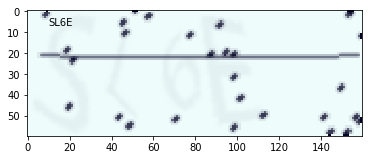

In [ ]:
def __demo_show_img():
    
    text, image = wrap_gen_captcha_text_and_image()

    print("capcha_reading_channel:", image.shape)  

    f = plt.figure()
    ax = f.add_subplot(111)
    ax.text(0.1, 0.9, text, ha='center', va='center', transform=ax.transAxes)
    plt.imshow(image)

    plt.show()


if __name__ == '__main__':
  
    __demo_show_img()
    gen_and_save_image()
    pass

<div class="alert alert-block alert-success">At this point, what we did is that we implemented a chain of function step by step, each function will execute the former one. It is actually the last function _demo_show_img() that runs all of the pre-defined and created a dataset of captchas and labels which are ready to train our model  

<h1><font color = blue>Training the model 

## configuration <br>
* Configuration of the CNN model<br>
* We get the parameters of the model from open source <br>
* The model will have 3 convolution layers and one fully connected layer

In [11]:
'''This code in the document by <Wenhao Zheng> is licensed under the MIT License https://opensource.org/licenses/MIT'''

import tensorflow as tf

#from cfg import IMAGE_HEIGHT, IMAGE_WIDTH, CHAR_SET_LEN, MAX_CAPTCHA

X = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT * IMAGE_WIDTH])
Y = tf.placeholder(tf.float32, [None, MAX_CAPTCHA * CHAR_SET_LEN])
keep_prob = tf.placeholder(tf.float32)  # dropout


def crack_captcha_cnn(w_alpha=0.01, b_alpha=0.1):


    x = tf.reshape(X, shape=[-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1])

    # 3 convolution layer
    w_c1 = tf.Variable(w_alpha * tf.random_normal([3, 3, 1, 32]))
    b_c1 = tf.Variable(b_alpha * tf.random_normal([32]))
    conv1 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(x, w_c1, strides=[1, 1, 1, 1], padding='SAME'), b_c1))
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv1 = tf.nn.dropout(conv1, keep_prob)

    w_c2 = tf.Variable(w_alpha * tf.random_normal([3, 3, 32, 64]))
    b_c2 = tf.Variable(b_alpha * tf.random_normal([64]))
    conv2 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv1, w_c2, strides=[1, 1, 1, 1], padding='SAME'), b_c2))
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.nn.dropout(conv2, keep_prob)

    w_c3 = tf.Variable(w_alpha * tf.random_normal([3, 3, 64, 64]))
    b_c3 = tf.Variable(b_alpha * tf.random_normal([64]))
    conv3 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv2, w_c3, strides=[1, 1, 1, 1], padding='SAME'), b_c3))
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Fully connected layer
    w_d = tf.Variable(w_alpha * tf.random_normal([8 * 20 * 64, 1024]))
    b_d = tf.Variable(b_alpha * tf.random_normal([1024]))
    dense = tf.reshape(conv3, [-1, w_d.get_shape().as_list()[0]])
    dense = tf.nn.relu(tf.add(tf.matmul(dense, w_d), b_d))
    dense = tf.nn.dropout(dense, keep_prob)

    w_out = tf.Variable(w_alpha * tf.random_normal([1024, MAX_CAPTCHA * CHAR_SET_LEN]))
    b_out = tf.Variable(b_alpha * tf.random_normal([MAX_CAPTCHA * CHAR_SET_LEN]))
    out = tf.add(tf.matmul(dense, w_out), b_out)  # 36*4
    # out = tf.reshape(out, (CHAR_SET_LEN, MAX_CAPTCHA))  # Resize into the shape of 4,36 
    # out = tf.nn.softmax(out)
    return out

C:\Software\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Define functions for future use<br>
* char2pos(): Convert text into position information<br>
* pos2char(): Convert position information into text<br>
* convert2gray(image): Convert image into black and white<br>
* text2vec(text): Convert text into matrix<br>
* vec2text(vec): Convert matrix into text<br>
* get_next_batch(batch_size=128): Generate data by batch<br>

* The two function below are used to determine the position of one particular character in the gen_char_set list defined at the beginning or the other way around. <br>
* Note that in the gen_char_set list, the numbers are set at the first 10 positions, followed be 26 capital English characters, with 26 lower case characters behind(if you chose to add). That is how we get our parameters. <br>
* Ord() function returns the index of one character in the gen_char_set list.<br>

In [12]:
def char2pos(c):
    '''
    Convert character into corresponding position 
    
    '''
    
    if c == '_':
        k = 62
        return k
    k = ord(c) - 48
    if k > 9:
        k = ord(c) - 55
        if k > 35:
            k = ord(c) - 61
            if k > 61:
                raise ValueError('No Map')
    return k


def pos2char(char_idx):
    """
    Convert the postion information into actual text
    
    """

    if char_idx < 10:
        char_code = char_idx + ord('0')
    elif char_idx < 36:
        char_code = char_idx - 10 + ord('A')
    elif char_idx < 62:
        char_code = char_idx - 36 + ord('a')
    elif char_idx == 62:
        char_code = ord('_')
    else:
        raise ValueError('error')

    return chr(char_code)

<div class="alert alert-block alert-success">The two functions above will be used in turning the label into matrix in the next two functions defined below

* The functions below is defined to convert label text into vector, which could be seen a matrix
And convert the vector back into text<br>
* Our captcha can only be processed when it is converted into a matrix consist of ‘1’ and ‘0’ indicating ‘black’ and ‘white’ on the image. So we turn our target value ---- the text in to matrix, to make connection between the captcha and it’s label when training the model.<br>
* The vector of the text would have 4 rows for each character and 36 columns from the set of characters and numbers created earlier. This way we are able to indicate what is in the text through the metrix.<br>
* char2pos(c) and pos2char(char_idx) mentioned above are utilized to help the convert


In [13]:
'''Convert text to vector'''
def text2vec(text):
    text_len = len(text)
    if text_len > MAX_CAPTCHA: 
        '''MAX_CAPTCHA = 4'''
        raise ValueError('The upper limit of captcha length is 4')

    vector = np.zeros(MAX_CAPTCHA * CHAR_SET_LEN) 
    '''CHAR_SET_LEN = 36, which means 4 rows and 36 columns.'''
    '''np.zeros() would return a new array of given shape and type, filled with zeros'''
    
    for i, c in enumerate(text):
        idx = i * CHAR_SET_LEN + char2pos(c)
        vector[idx] = 1
    return vector


'''Convert vector to text'''
def vec2text(vec):
    char_pos = vec.nonzero()[0]
    text = []
    for i, c in enumerate(char_pos):
        char_at_pos = i  # c/63
        char_idx = c % CHAR_SET_LEN

        char_code = pos2char(char_idx)

        text.append(chr(char_code))
    return "".join(text)



if __name__ == '__main__':
    text = 'XD8K'
    print(text2vec(text))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h3>dimensionality reduction</h3>
* Convert the image into black and white, since colors have no effect on character recognizing 

In [14]:
def convert2gray(img):
    
    if len(img.shape) > 2:
        gray = np.mean(img, -1)
        return gray
    else:
        return img


<h3>Data generator</h3>
* get_next_batch(batch_size=128) is designed to generate batches of captcha and label pair. <br>
* One batch is consisted of 128 pair of captchas and labels.<br>
* batch_x() and batch_y() are first generated as the containers of captcha and label matrix, which means they are matrix in the size of the image and text, but all the values are ‘0’<br>
* In the for loop, image and text pair are first created by the function wrap_gen_captcha_text_and_image() defined in the generate captcha chapter. Then the image is converted into black and white by calling the function convert2gray(image).<br>
* At last, image.flatten() / 255 turned all the ‘black’ value, which is 255, into 1, so we get our matrix for the image, and the label are also converted into matrix by text2vec(text)


In [15]:
def get_next_batch(batch_size=128):
    
    batch_x = np.zeros([batch_size, IMAGE_HEIGHT * IMAGE_WIDTH])
    batch_y = np.zeros([batch_size, MAX_CAPTCHA * CHAR_SET_LEN])

    for i in range(batch_size):
        text, image = wrap_gen_captcha_text_and_image()
        image = convert2gray(image)

        batch_x[i, :] = image.flatten() / 255  # (image.flatten()-128)/128  mean is zero
        batch_y[i, :] = text2vec(text)

    return batch_x, batch_y

# Train the model

<h3>Now we start to train the model</h3>

In [ ]:
def train_crack_captcha_cnn():
    '''shape the logits data and label data into certain format ---- 36 rows and 4 columns'''
    output = crack_captcha_cnn()
    predict = tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN])  
    label = tf.reshape(Y, [-1, MAX_CAPTCHA, CHAR_SET_LEN])

    '''correct_pred is the variable to indicate weather the prediction is right or wrong'''
    max_idx_p = tf.argmax(predict, 2)  
    max_idx_l = tf.argmax(label, 2)
    correct_pred = tf.equal(max_idx_p, max_idx_l)

    '''Use softmax_cross_entropy and sigmoid_cross_entropy as loss function and send the result into “summary”, 
    which will be used to implement data visualization in tensor board '''
    with tf.name_scope('my_monitor'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predict, labels=label))
        # loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
    tf.summary.scalar('my_loss', loss)

    '''set the optimizer as AdamOptimizer
    To speed up the traning processing, the learning_rate should be high at first and decrease gradually'''
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    with tf.name_scope('my_monitor'):
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    tf.summary.scalar('my_accuracy', accuracy)

    '''This block of code is used to save the training model in sess'''
    saver = tf.train.Saver() 

    sess = tf.InteractiveSession(
        config=tf.ConfigProto(
            log_device_placement=False
        )
    )

    sess.run(tf.global_variables_initializer())
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter(tb_log_path, sess.graph)

    
    '''Start the training process in the while loop'''
    step = 0
    while True:
        batch_x, batch_y = get_next_batch(64)  # 64
        _, loss_ = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.95})
        print(step, 'loss:\t', loss_)

        step += 1

        '''save the traning model every 2000 steps'''
        if step % 2000 == 0:
            saver.save(sess, save_model, global_step=step)


        '''Calculate the accuracy every 50 step on a newly generated dataset'''
        if step % 50 != 0:
            continue

        batch_x_test, batch_y_test = get_next_batch(256)  
        acc = sess.run(accuracy, feed_dict={X: batch_x_test, Y: batch_y_test, keep_prob: 1.})
        print(step, 'acc---------------------------------\t', acc)

        '''Terminate the training process when the accuracy comes up to 98%'''
        if acc > 0.98:
            break

        '''show the training output in tensor board'''
        summary = sess.run(merged, feed_dict={X: batch_x_test, Y: batch_y_test, keep_prob: 1.})
        writer.add_summary(summary, step)


if __name__ == '__main__':
    train_crack_captcha_cnn()
    print('end')
    pass

<h1><font color = blue>Predict

<h3>Import packages for future use</h3>

In [ ]:
import time

<font color = blue>_This function use the sess to predict the captcha_

In [1]:
def crack_captcha(captcha_image):

    output = crack_captcha_cnn()
    
    saver = tf.train.Saver()
   
    with tf.Session() as sess:
        #saver = tf.train.import_meta_graph("/Users/apple/work/crack/model/crack_capcha.model-10000-1500.meta")
        saver.restore(sess, tf.train.latest_checkpoint(model_path1))
        predict = tf.argmax(tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN]), 2)
        text_list = sess.run(predict, feed_dict={X: [captcha_image], keep_prob: 1})
        text = text_list[0].tolist()
        vector = np.zeros(MAX_CAPTCHA * CHAR_SET_LEN)
        i = 0
        for n in text:
            vector[i * CHAR_SET_LEN + n] = 1
            i += 1
        return vec2text(vector)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


CAPTCHA_MAX_LEN 4
CHAR_SET_LEN: 36


<font color = blue>wrap_gen_captcha_text_and_image() used to generate text and image dataset_<br>
convert2gray() will convert all the images into balck and write, so as to deduct the information conveyed into the training model<br>
predict the captcha, the output would be in the "target value:  predict text:  " format

In [2]:
text,image = wrap_gen_captcha_text_and_image()
image = convert2gray(image)
image = image.flatten()/255
predict_text = crack_captcha(image)
print("target value: {}  predict text: {}".format(text, predict_text))

INFO:tensorflow:Restoring parameters from /Users/apple/work/crack/model_sigmoid/crack_capcha.model-10000-4000
target value: HLPQ  predict text: HLPQ


<h1><font color = blue>Evaluation



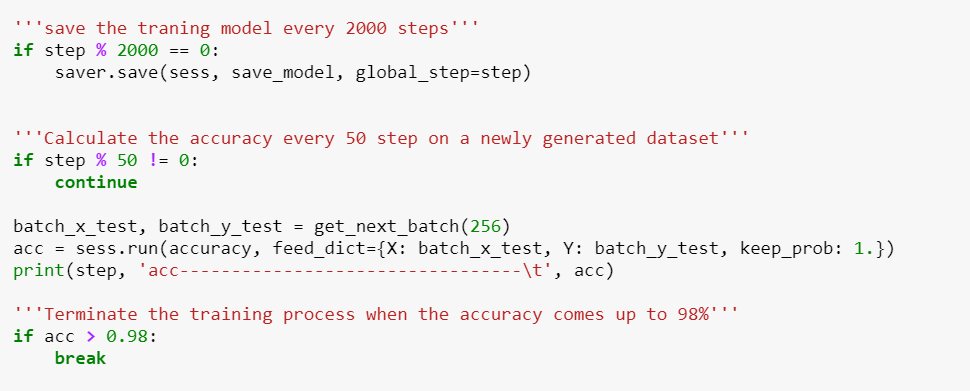

* When looking at the training part, we can see that we save our model every 2000 steps we run.<br> 
* Every 50 steps we run, we call the ” get_next_batch(256)”  function to generate a new test set of 256 captchas which the training model has never laid hands on, and then we use how well the model trained performed on the test dataset. <br>
* If the accuracy reach to 98%, we stop the training process since it has already meet our requirements. 

<h1><font color = blue>Conclusion

<h4>Example of captcha we generate</h4>

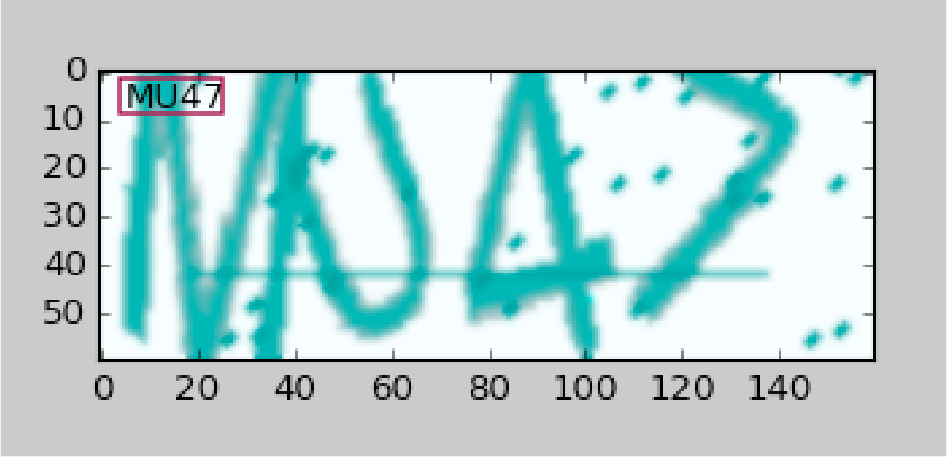

**We use two functions as loss function, sigmoid cross entropy function and softmax cross entropy function.<br>
And the results are listed below:<br>
a.	Sigmoid: 95% accuracy after 6000 steps of training<br>
b.	Softmax: reach 90% accuracy after 8000 step**<br><br>

**Use tensorboard to monitor the accuracy:**<br><br>
**sigmod-6k**
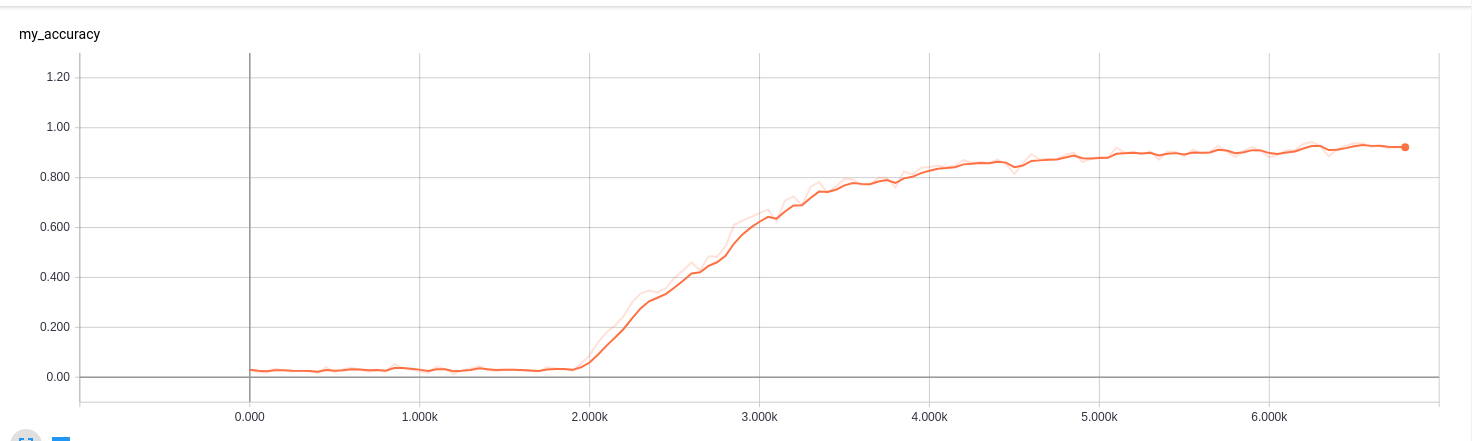
<br><br>

**sigmod-8k**

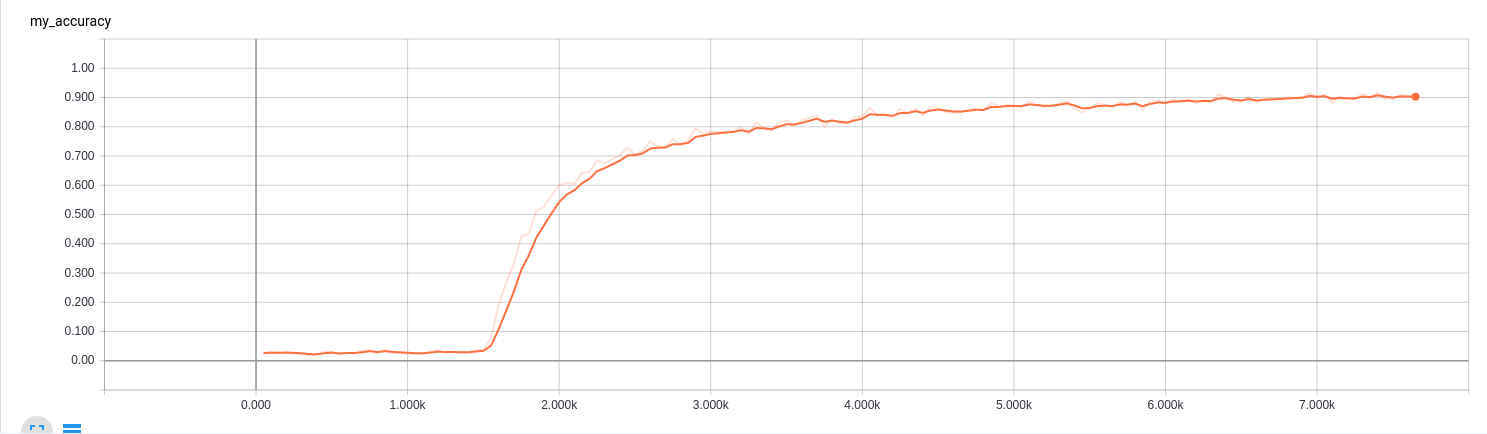

# <font color=blue>The License

## License

[![MIT](http://nikbearbrown.com/YouTube/MachineLearning/IMG/MIT-license-sm.png)](https://opensource.org/licenses/MIT)

The MIT License (MIT)
=====================

Permission is hereby granted, free of charge, to any person
obtaining a copy of this software and associated documentation
files (the “Software”), to deal in the Software without
restriction, including without limitation the rights to use,
copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following
conditions:

The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY,
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR
OTHER DEALINGS IN THE SOFTWARE.